<a href="https://colab.research.google.com/github/0-th/Can-You-Solve-a-Problem/blob/iris-classifier/In-house/iris-classifier/Iris_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Iris Species

There are couple of iris flowers gathered by a hobbyist, for which she has measurements, there are also measurements for known species of iris flowers, from an expert botanist, the species are identified based on the measurement of the **petals** and **sepals**, into 3 species of iris flowers, **setosa**, **versicolor** or **virginica**, based on these, assuming these are the only species of iris flowers found in the wild, our model should be able to identify unknown species of iris flowers

This is a **classification problem** since we know the **classes**, it's also a **supervised learning problem**

### Meeting the Data

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd

In [ ]:
# importing the data from the sklearn datasets module
from sklearn.datasets import load_iris
iris_dataset = load_iris()

The instance of the load_iris class created in the previous cell is a **bunch object**, and it's very similar to a dictionary

In [ ]:
print(f"Keys of iris_datasets {iris_dataset.keys()}")

Keys of iris_datasets dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


The DESCR contains a string, describing the dataset

In [ ]:
# The description
print(f"{iris_dataset['DESCR'][:500]}")
print(f"....")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                

....


The target_names contains the names of the different classes of the target variable - iris species

In [ ]:
# the target_names
print(f"Target names: {iris_dataset['target_names']}")

Target names: ['setosa' 'versicolor' 'virginica']


The feature_names contains the names or labels of the Independent variables

In [ ]:
# feature_names
print(f"Feature names: {iris_dataset['feature_names']}")

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data contains the actual features of the **samples**.  
Each row contains the value of each _features_ for that sample - _sepal length, sepal width, petal length, petal width_

In [ ]:
# data
print(f"Shape of Data: {iris_dataset['data'].shape}")
print(f"Data: {iris_dataset['data'][:5]}")

Shape of Data: (150, 4)
Data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


The shape of the data array shows that it contains 4 seperate measurments (columns) for the sepal, and petal of 150 iris flowers (rows)

In [ ]:
# shape of the target feature.
print(f"Shape of the target: {iris_dataset['target'].shape}\n")
# the target variables
print(f"The target variables: {iris_dataset['target']}\n")
# target variable names
print(f"The target variable names: {iris_dataset['target_names']}")

Shape of the target: (150,)

The target variables: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

The target variable names: ['setosa' 'versicolor' 'virginica']


The target label indicates the classes of the target variables, labelled with 0,1,2  
0 - Setosa  
1 - Versicolor  
2 - Virginica  
  
> 50 samples exist for each class in the dataset

## Training and Testing Data

The data used to train the model cannot also be used to test if the model is correct.  
The dataset has to be split into the train and the test data.
Scikit-learn already has a functions that can randomly split the data into split and test cases

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"], iris_dataset["target"], random_state=0)

In [ ]:
print(f"Independent training variables (X-train) shape: {X_train.shape}")
print(f"Dependent training variable (Y-train) shape: {y_train.shape}")

Independent training variables (X-train) shape: (112, 4)
Dependent training variable (Y-train) shape: (112,)


In [ ]:
print(f"Independent test variables (X-test) shape: {X_test.shape}")
print(f"Dependent test variables (Y-test) shape: {y_test.shape}")

Independent test variables (X-test) shape: (38, 4)
Dependent test variables (Y-test) shape: (38,)


In [ ]:
print(f"{y_test}")

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


## Looking at the data

One of the first good things to do is to create visualizations, of the dataset in order to discover abnormalities in the dataset, or check if the problem can be solved without machine learning.

If the Dataframe contains more than two-features since the computer screen is bi-dimensional, it may not be able to visualize it properly a good way of visualizing in such cases are to use a pair plot

In [ ]:
# convert to dataframe for visualization.
iris_df = pd.DataFrame(data=X_train, columns=iris_dataset.feature_names)
iris_df["target"] = y_train
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.9,3.0,4.2,1.5,1
1,5.8,2.6,4.0,1.2,1
2,6.8,3.0,5.5,2.1,2
3,4.7,3.2,1.3,0.2,0
4,6.9,3.1,5.1,2.3,2


###**Multivariate analysis**

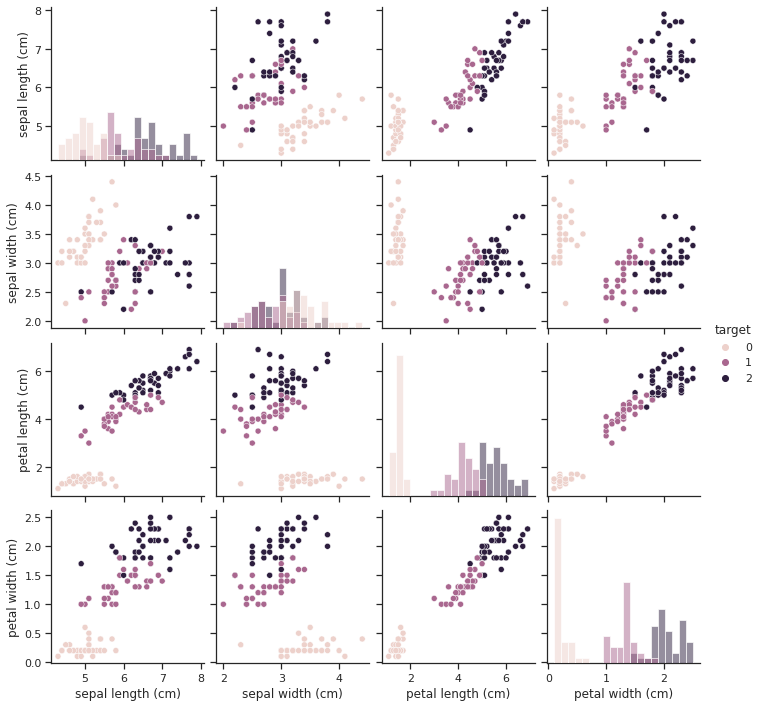

In [ ]:
# visualizing the dataframe
import seaborn as sns
import matplotlib.pyplot as plt


# set seaborn 
sns.set_theme(style="ticks")

# pair plot
sns.pairplot(data=iris_df, hue="target", diag_kind="hist", diag_kws={"bins": 20})
# ax.set_title("Iris Features")

The classes seem to be well seperated, means a machine learning model will be able to learn to seperate them

## Model Building: K-Nearest Neighbours

The model that will be used to classify the iris flowers in the data set is a **K-Neighbours** classifier.
- How it works:  
The model takes a new data entry that it's trying to make predictions for and then finds the **k** number of entries that have values that are close the new data entry, then using the *majority* class in the entries, it identifies or predicts the new data entry's target variable

In [ ]:
# import the classifier and instantiate it
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# train the model on the train data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Making predictions

In [ ]:
y_pred = knn.predict(X_test)
print(f"Model Predictions: {y_pred}")

Model Predictions: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


How do we know if these predictions are accurate, by evaluating the model

## Evaluating the model

In [ ]:
# Manually finding the accuracy
print(f"Model accuracy: {np.mean(y_pred == y_test):.2f}")

Model accuracy: 0.97


In [ ]:
# Using the score method
print(f"Model accuracy: {knn.score(X_test, y_test):.2f}")

Model accuracy: 0.97


**NOTE:** Unlike other evaluation metrics when using the knn.score() method, you don't need to pass predicted target variables, or even make any predictions at all, just pass the test data and it makes predictions and makes evaluations.